<a href="https://colab.research.google.com/github/Noahbisht0/Machine-Learning-IBM-db2_sql/blob/main/AI11_LRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
#simple linear regression

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-03-26 14:56:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   243KB/s    in 0.3s    

2021-03-26 14:56:15 (243 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
df = pd.read_csv("FuelConsumption.csv")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
features = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f943d190>,
      dtype=object)

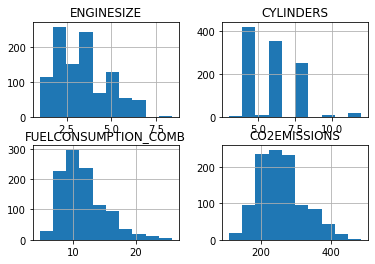

In [ ]:
features.hist()

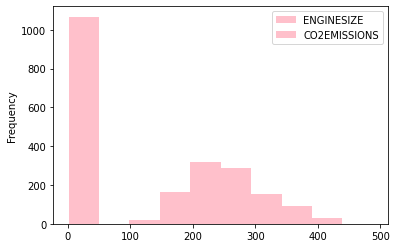

In [ ]:
viz = df[["ENGINESIZE","CO2EMISSIONS"]]
viz.plot(kind="hist",color="pink")


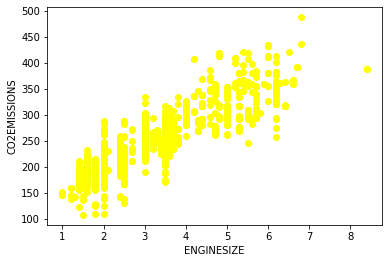

In [ ]:
plt.scatter(features.ENGINESIZE,features.CO2EMISSIONS,color="yellow")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [ ]:
split = np.random.rand(len(df)) < 0.8
train =  features[split]
test =  features[~split]

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
lr.fit(train_x,train_y)
print("coefficient: ",lr.coef_)
print("intercept: ",lr.intercept_)

coefficient:  [[38.89490404]]
intercept:  [125.67839462]


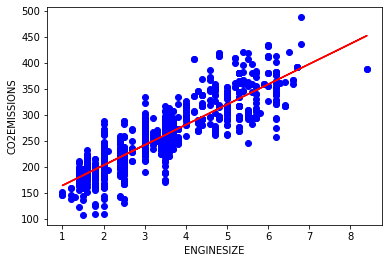

In [ ]:
plt.scatter(features.ENGINESIZE,features.CO2EMISSIONS,color="blue")
plt.plot(train_x,lr.coef_[0][0]*train_x + lr.intercept_[0],'-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test_x = test[["ENGINESIZE"]] 
test_y = test[["CO2EMISSIONS"]]
pred = lr.predict(test_x)
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y - pred)))
print("mean squared error: %.2f" % np.mean((test_y - pred) ** 2))
print("R2 score: %.2f" % r2_score(test_y,pred))

mean absolute error: 22.47
mean squared error: 839.26
R2 score: 0.79


In [ ]:
#multiple linear regression

In [ ]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
mlr.fit(train_x,train_y)
print("coefficient: ",mlr.coef_)
print("intercept: ",mlr.intercept_)

coefficient:  [[10.44730651  7.68809482  9.63896008]]
intercept:  [64.75044827]


In [ ]:
from sklearn.metrics import r2_score
test_x = test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]] 
test_y = test[["CO2EMISSIONS"]]
pred = mlr.predict(test_x)
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y - pred)))
print("mean squared error: %.2f" % np.mean((test_y - pred) ** 2))
print("R2 score: %.2f" % r2_score(test_y,pred))
print("variance score: %.2f" % mlr.score(test_x,test_y))

mean absolute error: 16.41
mean squared error: 507.20
R2 score: 0.87
variance score: 0.87


In [ ]:
# non-linear regression 
# polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(train_x)
x_poly

array([[ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [ ]:
plr = linear_model.LinearRegression()
plr.fit(x_poly,train_y)
print("coefficient: ",plr.coef_)
print("intercept: ",plr.intercept_) 

coefficient:  [[ 0.         26.6774567   5.22821797 -0.57654549]]
intercept:  [131.74126518]


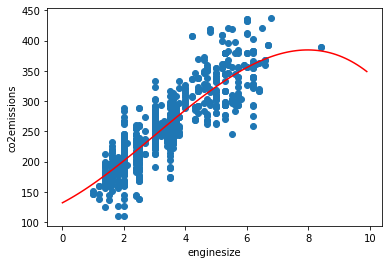

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
xx = np.arange(0.0,10.0,0.1)
yy = plr.intercept_[0] + plr.coef_[0][1]*xx + plr.coef_[0][2]*np.power(xx,2) + plr.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy,'-r')
plt.xlabel("enginesize")
plt.ylabel("co2emissions")
plt.show()

In [ ]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2021-03-26 15:00:01 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
data = pd.read_csv("china_gdp.csv")
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


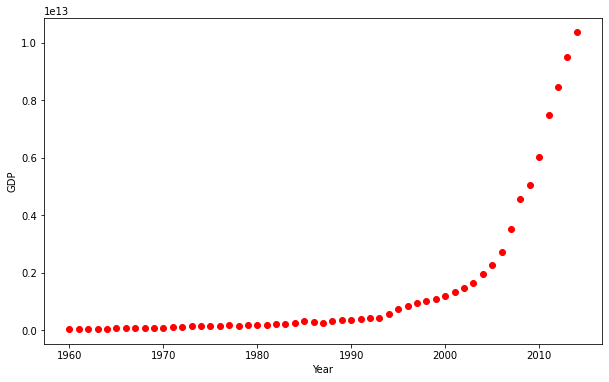

In [ ]:
plt.figure(figsize=(10,6))
x_data,y_data = (data["Year"].values,data["Value"].values)
plt.plot(x_data,y_data,"ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

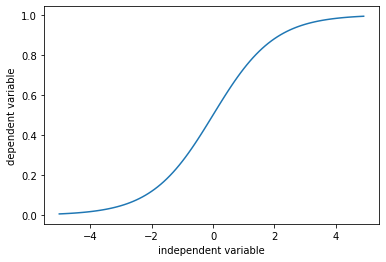

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = 1.0/(1.0 + np.exp(-x))
plt.plot(x,y)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

In [ ]:
def sigmoid(x,beta1,beta2):
  y = 1 / (1 + np.exp(-beta1*(x-beta2)))
  return y 

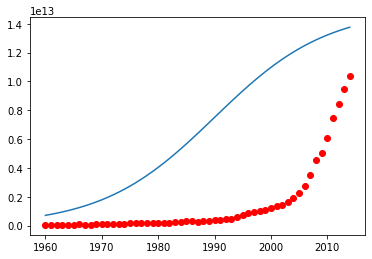

In [ ]:
beta1 = 0.10
beta2 = 1990.0
y_pred = sigmoid(x_data,beta1,beta2)
plt.plot(x_data,y_data,'ro')
plt.plot(x_data,y_pred*15000000000000.)

In [ ]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [ ]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,xdata,ydata)
print("beta1 = %f,beta2 = %f" %(popt[0],popt[1]))

beta1 = 690.453017,beta2 = 0.997207


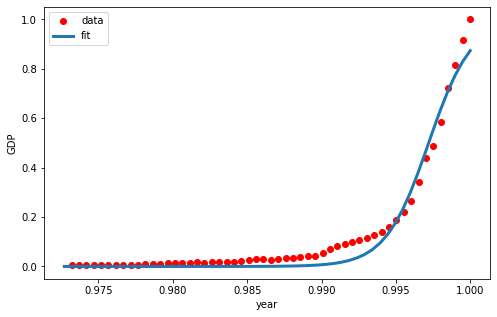

In [ ]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label="fit")
plt.legend(loc="best")
plt.ylabel("GDP")
plt.xlabel("year")
plt.show()